### Foundation of Machine Learning
### Final Project-Group 7
### Submitted by: &nbsp;&nbsp;Dev Bharatbhai Patel (8938546)
### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Devarsh Sandip Shah (8917026)

# Advance Fruit Detection Classification using CNN - Keras

## [Code Reference](https://www.kaggle.com/code/muhammedtuncayaydn/96-accuracy-with-cnn-algo-and-data-visualization)

# Step-1 Importing Required Libraries and Packages

In [54]:
# Libraries for file and directory operations
import os
import shutil

# avoid warnings
import warnings 
warnings. filterwarnings('ignore')

# Library for data processing
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image

# Libraries for deep learning model
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from sklearn.metrics import classification_report

# Step-2 Importing & Loading the [Fruits360 Dataset](https://www.kaggle.com/datasets/moltean/fruits/data)

In [2]:
# dataset path
dataset_path = 'D:\College\FML\Week-15\Fruit_Image_Classification\\archive\\fruits-360_dataset\\fruits-360'

# Define training and test folders
training_folder_path = "D:\College\FML\Week-15\Fruit_Image_Classification\\archive\\fruits-360_dataset\\fruits-360\\Training"
test_folder_path = "D:\College\FML\Week-15\Fruit Image Classification\\archive\\fruits-360_dataset\\fruits-360\\Test"

In [3]:
# Counting total labels
def count_labels(folder_path):
    label_count = 0
    for _, dirs, _ in os.walk(folder_path):
        label_count += len(dirs)
        break 
    return label_count

num_labels = count_labels(training_folder_path)
print(f"Number of labels (folders) in the training dataset: {num_labels}")

Number of labels (folders) in the training dataset: 127


* This means that there are 127 classes of fruits and vegetable within the dataset (including variants).

### Exploring labels within training folder

In [4]:
# Get a list of all labels (subfolder names) within the training folder
labels = [label for label in os.listdir(training_folder_path) if os.path.isdir(os.path.join(training_folder_path, label))]

# Sort the labels alphabetically
sorted_labels = sorted(labels)

# Print the list of labels
print("Sorted Labels:")
for label in sorted_labels:
    print(label)

Sorted Labels:
Apple Braeburn
Apple Crimson Snow
Apple Golden 1
Apple Golden 2
Apple Golden 3
Apple Granny Smith
Apple Pink Lady
Apple Red 1
Apple Red 2
Apple Red 3
Apple Red Delicious
Apple Red Yellow 1
Apple Red Yellow 2
Apricot
Avocado
Avocado ripe
Banana
Beetroot
Blueberry
Cactus fruit
Cantaloupe 1
Cantaloupe 2
Carambula
Cauliflower
Cherry 1
Cherry 2
Cherry Rainier
Cherry Wax Black
Cherry Wax Red
Cherry Wax Yellow
Chestnut
Clementine
Cocos
Corn
Corn Husk
Cucumber Ripe
Cucumber Ripe 2
Dates
Eggplant
Fig
Ginger Root
Granadilla
Grape Blue
Grape Pink
Grape White
Grape White 2
Grape White 3
Grape White 4
Guava
Hazelnut
Huckleberry
Kaki
Kiwi
Kohlrabi
Kumquats
Lemon
Lemon Meyer
Limes
Lychee
Mandarine
Mango
Mango Red
Mangostan
Maracuja
Melon Piel de Sapo
Mulberry
Nectarine
Nectarine Flat
Not a Fruit
Nut Forest
Nut Pecan
Onion Red
Onion Red Peeled
Onion White
Orange
Papaya
Passion Fruit
Peach
Peach 2
Peach Flat
Pear
Pear 2
Pear Abate
Pear Forelle
Pear Kaiser
Pear Monster
Pear Red
Pear Stone

From the above printed labels, we can see that a few fruits are available in more than one variety and have been separately labeled as belonging to a different class.

# Step-3 Sorting and filtering the dataset

* The dataset contains both fruits and vegetable images as seen from the class labels. Hence, it needs to be filtered for only fruits.

In [5]:
# creating a folder for filtered dataset in the working directory
def create_folders(destination_path):
    # Create "filtered_dataset" folder directly
    os.makedirs(destination_path, exist_ok=True)

    # Create "training" and "test" folders within "filtered_dataset"
    training_path = os.path.join(destination_path, "training")
    test_path = os.path.join(destination_path, "test")
    os.makedirs(training_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

if __name__ == "__main__":
    destination_path = "D:\College\FML\Week-15\Fruit_Image_Classification\\filtered_dataset"
    create_folders(destination_path)

    print(f"filtered_dataset folder created successfully in {destination_path}")
    print(f"Training folder created successfully in {destination_path}.")
    print(f"Test folder created successfully in {destination_path}.")

filtered_dataset folder created successfully in D:\College\FML\Week-15\Fruit_Image_Classification\filtered_dataset
Training folder created successfully in D:\College\FML\Week-15\Fruit_Image_Classification\filtered_dataset.
Test folder created successfully in D:\College\FML\Week-15\Fruit_Image_Classification\filtered_dataset.


# Step-4 Creating a subset of the main dataset with fruit labels



For this model, we have copied the following 15 fruits classes with all variant folders to both training and test datasets.
1. Apple
2. Banana
3. Blueberry
4. Guava
5. Grape
6. Kiwi
7. Lychee
8. Mango
9. Orange
10. Pineapple
11. Pomegranate
12. Raspberry
13. Strawberry
14. Watermelon
15. Not a Fruit

In [6]:
def copy_selected_folders(source_path, destination_path, selected_fruits):
    if not os.path.exists(source_path):
        print("Source path does not exist.")
        return

    source_folders = os.listdir(source_path)
    for fruit_pattern in selected_fruits:
        fruit_pattern = fruit_pattern.lower()  # Make sure the fruit pattern is in lowercase
        fruit_folder_matches = [f for f in source_folders if f.lower().startswith(fruit_pattern)]

        if not fruit_folder_matches:
            print(f"No variants found for '{fruit_pattern}'.")
            continue

        for source_folder in fruit_folder_matches:
            fruit_name = source_folder
            source_folder = os.path.join(source_path, source_folder)
            destination_folder = os.path.join(destination_path, fruit_name)
            try:
                shutil.copytree(source_folder, destination_folder)
                print(f"Fruit '{fruit_name}' copied successfully in {destination_path}.")
            except FileExistsError:
                print(f"Fruit '{fruit_name}' already exists in the destination path.")
                
# copy fruit folders to training folder
if __name__ == "__main__":
    source_path = "D:\College\FML\Week-15\Fruit_Image_Classification\\archive\\fruits-360_dataset\\fruits-360\Training"
    destination_path = "D:\College\FML\Week-15\Fruit_Image_Classification\\filtered_dataset\\training"
    
    # Selecting the fruit names to copy all variants
    selected_fruits = ["Apple","Banana", "Blueberry","Guava","Grape","Kiwi","Lychee","Mango", "Not a Fruit","Orange","Pineapple","Pomegranate", "Raspberry", "Strawberry","Watermelon"] 
  
    copy_selected_folders(source_path, destination_path, selected_fruits)
    
# copy fruit folders to test folder
if __name__ == "__main__":
    source_path = "D:\College\FML\Week-15\Fruit_Image_Classification\\archive\\fruits-360_dataset\\fruits-360\Test"
    destination_path = "D:\College\FML\Week-15\Fruit_Image_Classification\\filtered_dataset\\test"
    
    # Selecting the fruit names to copy all variants
    selected_fruits = ["Apple","Banana", "Blueberry","Guava","Grape","Kiwi","Lychee","Mango", "Not a Fruit", "Orange","Pineapple","Pomegranate", "Raspberry", "Strawberry","Watermelon"] 
  
    copy_selected_folders(source_path, destination_path, selected_fruits)

Fruit 'Apple Braeburn' already exists in the destination path.
Fruit 'Apple Crimson Snow' already exists in the destination path.
Fruit 'Apple Golden 1' already exists in the destination path.
Fruit 'Apple Golden 2' already exists in the destination path.
Fruit 'Apple Golden 3' already exists in the destination path.
Fruit 'Apple Granny Smith' already exists in the destination path.
Fruit 'Apple Pink Lady' already exists in the destination path.
Fruit 'Apple Red 1' already exists in the destination path.
Fruit 'Apple Red 2' already exists in the destination path.
Fruit 'Apple Red 3' already exists in the destination path.
Fruit 'Apple Red Delicious' already exists in the destination path.
Fruit 'Apple Red Yellow 1' already exists in the destination path.
Fruit 'Apple Red Yellow 2' already exists in the destination path.
Fruit 'Banana' already exists in the destination path.
Fruit 'Blueberry' already exists in the destination path.
Fruit 'Guava' already exists in the destination path.
F

# Step-5 Exploring the Dataset

In [7]:
training_subset="D:\College\FML\Week-15\Fruit_Image_Classification\\filtered_dataset\\training"
test_subset="D:\College\FML\Week-15\Fruit_Image_Classification\\filtered_dataset\\test"

# function to count images in each folder
def count_images_per_label(folder_path):
    label_counts = {
        label: len(os.listdir(os.path.join(folder_path, label)))
        for label in os.listdir(folder_path)
        if os.path.isdir(os.path.join(folder_path, label))
    }

    return label_counts

if __name__ == "__main__":
    # Count images in training folders
    training_label_counts = count_images_per_label(training_subset)
    test_label_counts = count_images_per_label(test_subset)
    sorted_training_label_counts = sorted(training_label_counts.items(), key=lambda x: x[1], reverse=True)
    sorted_test_label_counts = sorted(test_label_counts.items(), key=lambda x: x[1], reverse=True)
print("Training Label Counts (sorted by count):")
for label, count in sorted_training_label_counts:
    print(f"{label}: {count}")
print("Test Label Counts (sorted by count):")
for label, count in sorted_test_label_counts:
    print(f"{label}: {count}")

Training Label Counts (sorted by count):
Grape: 1943
Strawberry: 1230
Apple Green: 984
Apple Red: 984
Grape Blue: 984
Pineapple: 983
Strawberry Wedge: 738
Apple Red Yellow 2: 672
Pineapple Mini: 493
Apple Braeburn: 492
Apple Golden 2: 492
Apple Granny Smith: 492
Apple Red 1: 492
Apple Red 2: 492
Apple Red Yellow 1: 492
Grape Pink: 492
Grape White 3: 492
Pomegranate: 492
Apple Red Delicious: 490
Banana: 490
Grape White: 490
Grape White 2: 490
Guava: 490
Lychee: 490
Mango: 490
Raspberry: 490
Apple Golden 3: 481
Apple Golden 1: 480
Orange: 479
Watermelon: 475
Grape White 4: 471
Kiwi: 466
Blueberry: 462
Apple Pink Lady: 456
Apple Crimson Snow: 444
Apple Red 3: 429
Mango Red: 426
Mangostan: 300
Not a Fruit: 220
Test Label Counts (sorted by count):
Grape: 654
Strawberry: 410
Pineapple: 329
Apple Green: 328
Apple Red: 328
Grape Blue: 328
Banana: 318
Strawberry Wedge: 246
Apple Red Yellow 2: 219
Apple Red Delicious: 166
Grape White: 166
Grape White 2: 166
Guava: 166
Lychee: 166
Mango: 166
Rasp

In [10]:
#counting number of images
def count_total_images(folder_path):
    total_images = 0
    for _, _, files in os.walk(folder_path):
        total_images += len(files)
    return total_images

total_train_images_count = count_total_images(training_subset)
total_test_images_count = count_total_images(test_subset)

#Display total number of images in each folder of the dataset
print(f"Total number of images in the training dataset: {total_train_images_count}")
print(f"Total number of images in the test dataset: {total_test_images_count}")

Total number of images in the training dataset: 22948
Total number of images in the test dataset: 7822


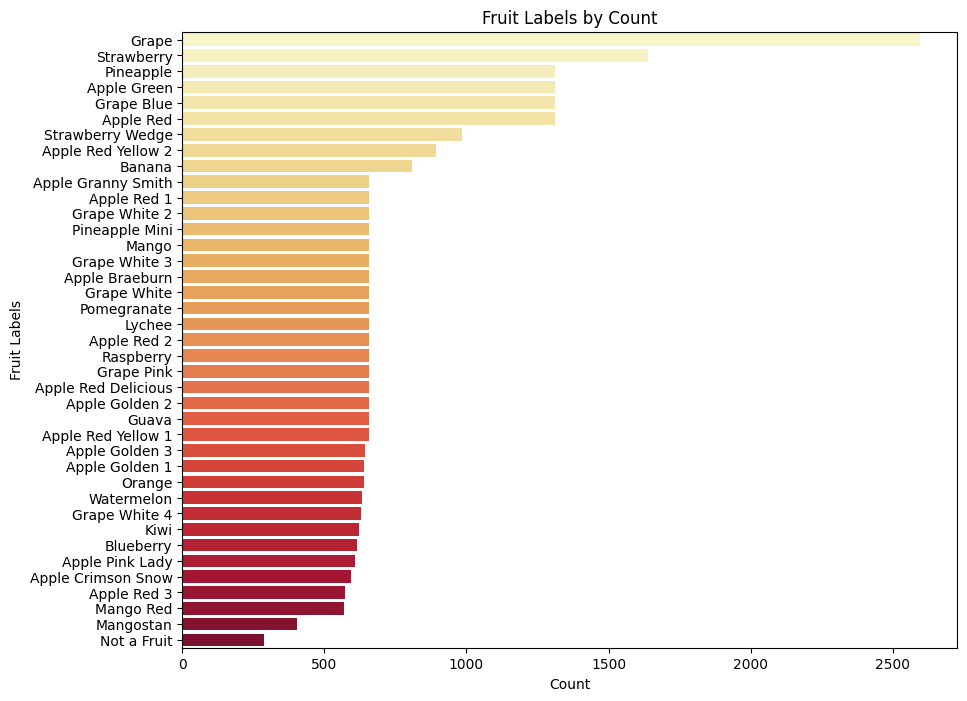

In [11]:
# Combine the training and test label counts into a single dictionary
combined_label_counts = {
    label: training_label_counts.get(label, 0) + test_label_counts.get(label, 0)
    for label in set(list(training_label_counts.keys()) + list(test_label_counts.keys()))
}

# Create a DataFrame to hold the combined fruit counts
df_fruit_counts = pd.DataFrame({"Fruit Labels": list(combined_label_counts.keys()), "Count": list(combined_label_counts.values())})

# Sort the DataFrame by the counts in descending order
df_fruit_counts = df_fruit_counts.sort_values(by="Count", ascending=False)

# Select the top 15 fruit labels by count
top_15_fruits = df_fruit_counts

# Plot the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x="Count", y="Fruit Labels", data=top_15_fruits, palette="YlOrRd")
plt.xlabel("Count")
plt.ylabel("Fruit Labels")
plt.title("Fruit Labels by Count")
plt.show()

In [12]:
BATCH_SIZE = 32
IMAGE_SIZE = 100
CHANNELS = 3
EPOCHS = 10

In [13]:
# training dataset pipeline
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_subset,
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 22948 files belonging to 39 classes.


In [14]:
#print training labels
tr_class_names = train_dataset.class_names
tr_class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Green',
 'Apple Pink Lady',
 'Apple Red',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Banana',
 'Blueberry',
 'Grape',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Guava',
 'Kiwi',
 'Lychee',
 'Mango',
 'Mango Red',
 'Mangostan',
 'Not a Fruit',
 'Orange',
 'Pineapple',
 'Pineapple Mini',
 'Pomegranate',
 'Raspberry',
 'Strawberry',
 'Strawberry Wedge',
 'Watermelon']

**Data Exploration**

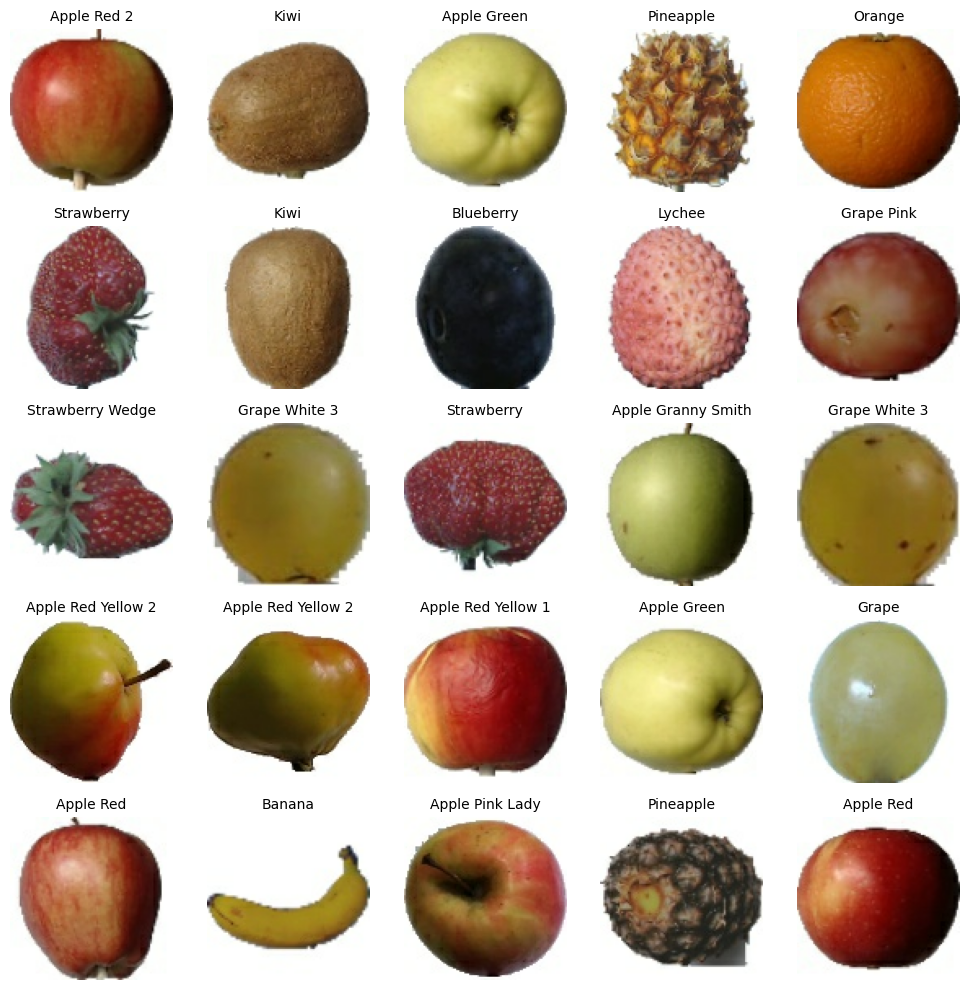

In [15]:
#visualizing sample images from the dataset
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(9):
    for i in range(25):
        ax = plt.subplot(5,5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(tr_class_names[labels_batch[i]], fontsize=10)
        plt.axis("off")

plt.tight_layout()
plt.show()


# Step-6 Preparing dataset

* Next, splitting the data in the training folder into train and validation sets.

In [16]:
# define a function to split the dataset 
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=1234)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)

    return train_ds, val_ds

In [17]:
train_ds, val_ds = get_dataset_partitions_tf(train_dataset)

In [18]:
print("Training dataset length",len(train_ds))
print("Validation dataset length",len(val_ds))

Training dataset length 574
Validation dataset length 143


In [19]:
# Optimization for Training and Validation Datasets by caching and shuffling
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
# resize and rescaling images to a specified size 
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# Step-7 Defining the CNN

In [21]:
# prefetching the training data to optimize pipeline
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
# Defining the shape of the input data batch for CNN
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Number of outputs
n_classes = len(tr_class_names)
print("Total number of Selected Classes:",n_classes)

Total number of Selected Classes: 39


### Remarks:
* Here the refered code used the 4 layer(32,32,64,128)
* We added once more layer of filter 64.
* We removed one dense layer of 1024.
* We changed the dropout to 0.25

In [23]:
# CNN model
model = Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [24]:
# Review the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 100, 100, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 98, 98, 32)          896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 49, 49, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 47, 47, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 23, 23, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 21, 21, 64)         

In [25]:
# specifying the optimizer and model metrics
model.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Step-8 Model Training

### Remarks:
* Before training the model we have taken 10 epochs instead of 100 epochs(reference code).

In [26]:
# saving the model training history
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS
)

Epoch 1/10


574/574 [==============================] - 158s 208ms/step - loss: 1.3261 - accuracy: 0.5373 - val_loss: 0.5861 - val_accuracy: 0.7251
Epoch 2/10
574/574 [==============================] - 139s 242ms/step - loss: 0.4758 - accuracy: 0.7484 - val_loss: 0.4754 - val_accuracy: 0.7463
Epoch 3/10
574/574 [==============================] - 156s 272ms/step - loss: 0.3970 - accuracy: 0.7635 - val_loss: 0.3610 - val_accuracy: 0.7749
Epoch 4/10
574/574 [==============================] - 160s 279ms/step - loss: 0.3688 - accuracy: 0.7658 - val_loss: 0.3305 - val_accuracy: 0.7773
Epoch 5/10
574/574 [==============================] - 152s 265ms/step - loss: 0.3556 - accuracy: 0.7654 - val_loss: 0.4118 - val_accuracy: 0.7642
Epoch 6/10
574/574 [==============================] - 137s 239ms/step - loss: 0.3443 - accuracy: 0.7711 - val_loss: 0.3537 - val_accuracy: 0.7681
Epoch 7/10
574/574 [==============================] - 160s 278ms/step - loss: 0.3460 - accuracy: 0.7655 - val_loss: 0.3204 - val_accura

### Remarks:
* Our accuracy was dropped because we added **Not a Fruit** class in the dataset.

* Saving the trained model in a pickle file

In [27]:
import pickle

# save the  model as a pickle file
model_pkl_file = "model_trained.pkl"  
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [40]:
# load model from pickle file
import pickle
model_pkl_file = "D:\College\FML\Week-15\Fruit_Image_Classification\project_cnn_model.pkl"
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)


# Step-9 Check for overfitting

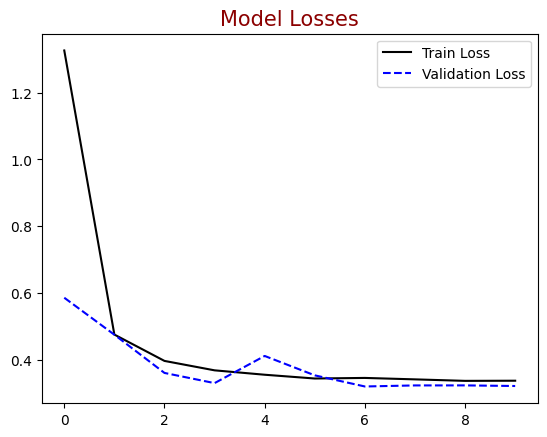

In [28]:
#Plotting train & validation loss
plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"],label = "Validation Loss", color = "blue", linestyle="dashed")
plt.title("Model Losses", color = "darkred", size = 15)
plt.legend()
plt.show()

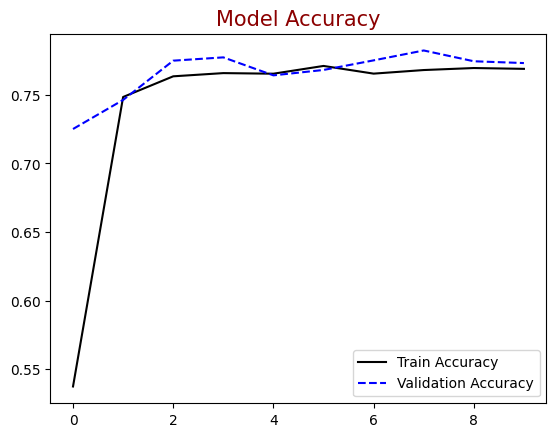

In [29]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(history .history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(history .history["val_accuracy"],label = "Validation Accuracy", color = "blue", linestyle="dashed")
plt.title("Model Accuracy", color = "darkred", size = 15)
plt.legend()
plt.show()

### Remarks:
* The validation accuracy starts a bit higher than the training accuracy, suggesting that the initial model could be slightly overfitting.
* Then, the two lines are close to each other, which indicates that the model is generalizing well and not overfitting significantly on the training data.
* Similarly, the training loss and validation loss decrease consistently, indicating a good fit between the model and the data.
* The model can be retrained for higher epochs with a different batch size for experimentation and evaluating a possible improvement in the model accuracy.

In [55]:
# Predict labels for the test set
predicted_labels = []
true_labels = []
for images_batch, labels_batch in test_dataset:
    batch_predictions = model.predict(images_batch)
    predicted_labels.extend(np.argmax(batch_predictions, axis=1))
    true_labels.extend(labels_batch.numpy())

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=tr_class_names)
print(report)

1/1 [==============================] - 0s 39ms/step
                     precision    recall  f1-score   support

     Apple Braeburn       0.00      0.00      0.00       164
 Apple Crimson Snow       1.00      0.84      0.92       148
     Apple Golden 1       0.82      1.00      0.90       160
     Apple Golden 2       0.00      0.00      0.00       164
     Apple Golden 3       0.78      1.00      0.88       161
 Apple Granny Smith       0.50      0.56      0.53       164
        Apple Green       0.50      0.65      0.57       328
    Apple Pink Lady       0.87      1.00      0.93       152
          Apple Red       0.49      0.43      0.46       328
        Apple Red 1       0.50      0.99      0.67       164
        Apple Red 2       0.76      0.87      0.81       164
        Apple Red 3       0.91      1.00      0.95       144
Apple Red Delicious       1.00      1.00      1.00       166
 Apple Red Yellow 1       0.98      0.78      0.87       164
 Apple Red Yellow 2       1.00  

# Step-10 Creating a test data pipeline

In [30]:
# test dataset pipeline
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   test_subset,
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 7822 files belonging to 39 classes.


In [31]:
#print training labels
ts_class_names = test_dataset.class_names
ts_class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Green',
 'Apple Pink Lady',
 'Apple Red',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Banana',
 'Blueberry',
 'Grape',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Guava',
 'Kiwi',
 'Lychee',
 'Mango',
 'Mango Red',
 'Mangostan',
 'Not a Fruit',
 'Orange',
 'Pineapple',
 'Pineapple Mini',
 'Pomegranate',
 'Raspberry',
 'Strawberry',
 'Strawberry Wedge',
 'Watermelon']

# Step-11 Predicting a sample image

first image to predict
actual label: Watermelon
1/1 [==============================] - 0s 57ms/step
predicted label: Watermelon


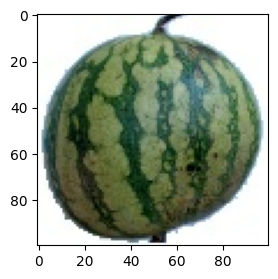

In [39]:
# Fetching model predictions for sample image in test dataset
plt.figure(figsize=(3, 3))
for images_batch, labels_batch in test_dataset.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",ts_class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",tr_class_names[np.argmax(batch_prediction[0])])

# Batch prediction on unseen images from test dataset

In [42]:
# Defining prediction function for testing images
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = ts_class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

### Prediction set 1


1/1 [==============================] - 0s 19ms/step


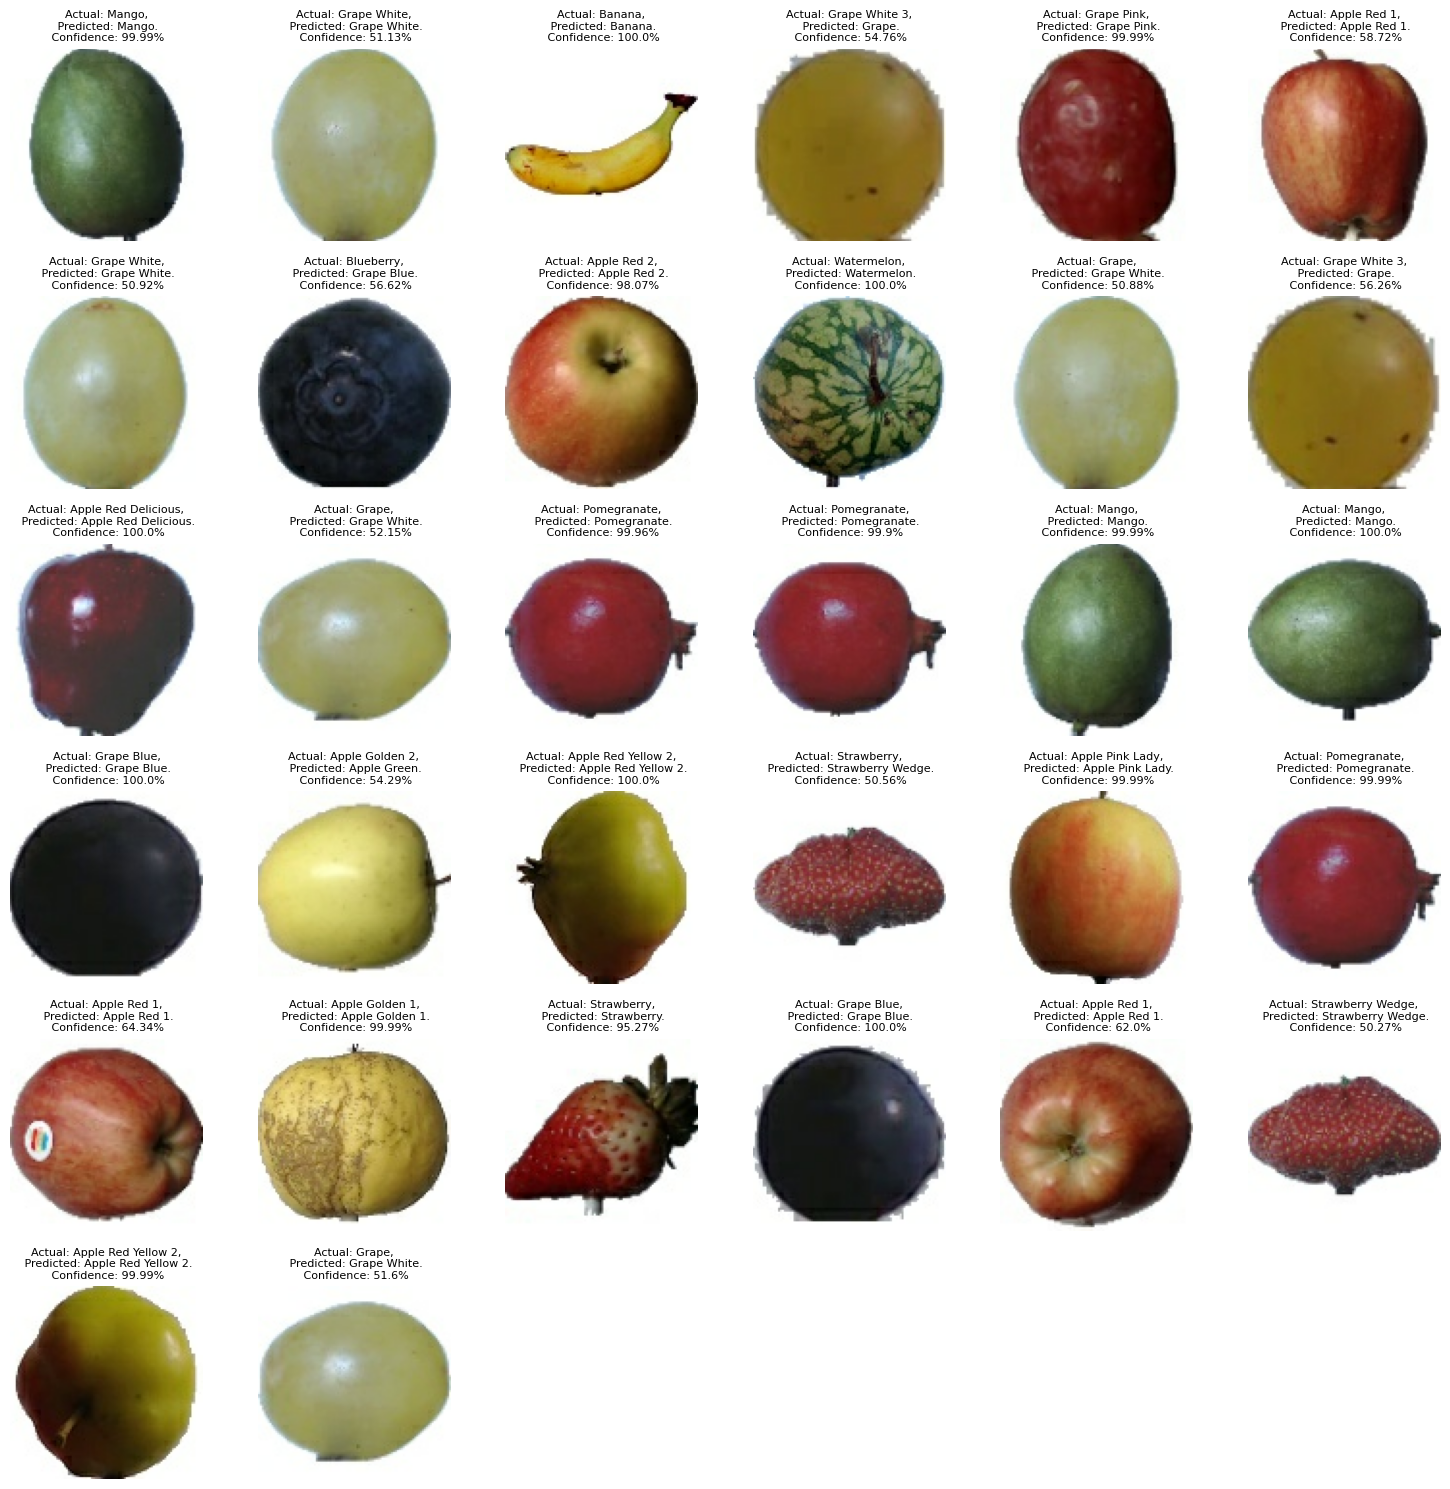

In [59]:
plt.figure(figsize=(15, 15))

# Iterate over the batches and then the images to display their predictions
batch_size = 32
for images, labels in test_dataset.take(12):
    for i in range(batch_size):
        if i >= len(images):
            break

        ax = plt.subplot(6, 6, i + 1)
        image = tf.image.resize(images[i], (100, 100))
        plt.imshow(image.numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = ts_class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", fontsize=8)
        plt.axis("off")

    # If there are more than batch size images, break out of the loop
    if i >= batch_size - 1:
        break

# Hide any empty subplots
for i in range(i + 1, batch_size):
    plt.subplot(6,6, i + 1)
    plt.axis("off")

plt.tight_layout()
plt.show()

### Prediction set 2


1/1 [==============================] - 0s 22ms/step


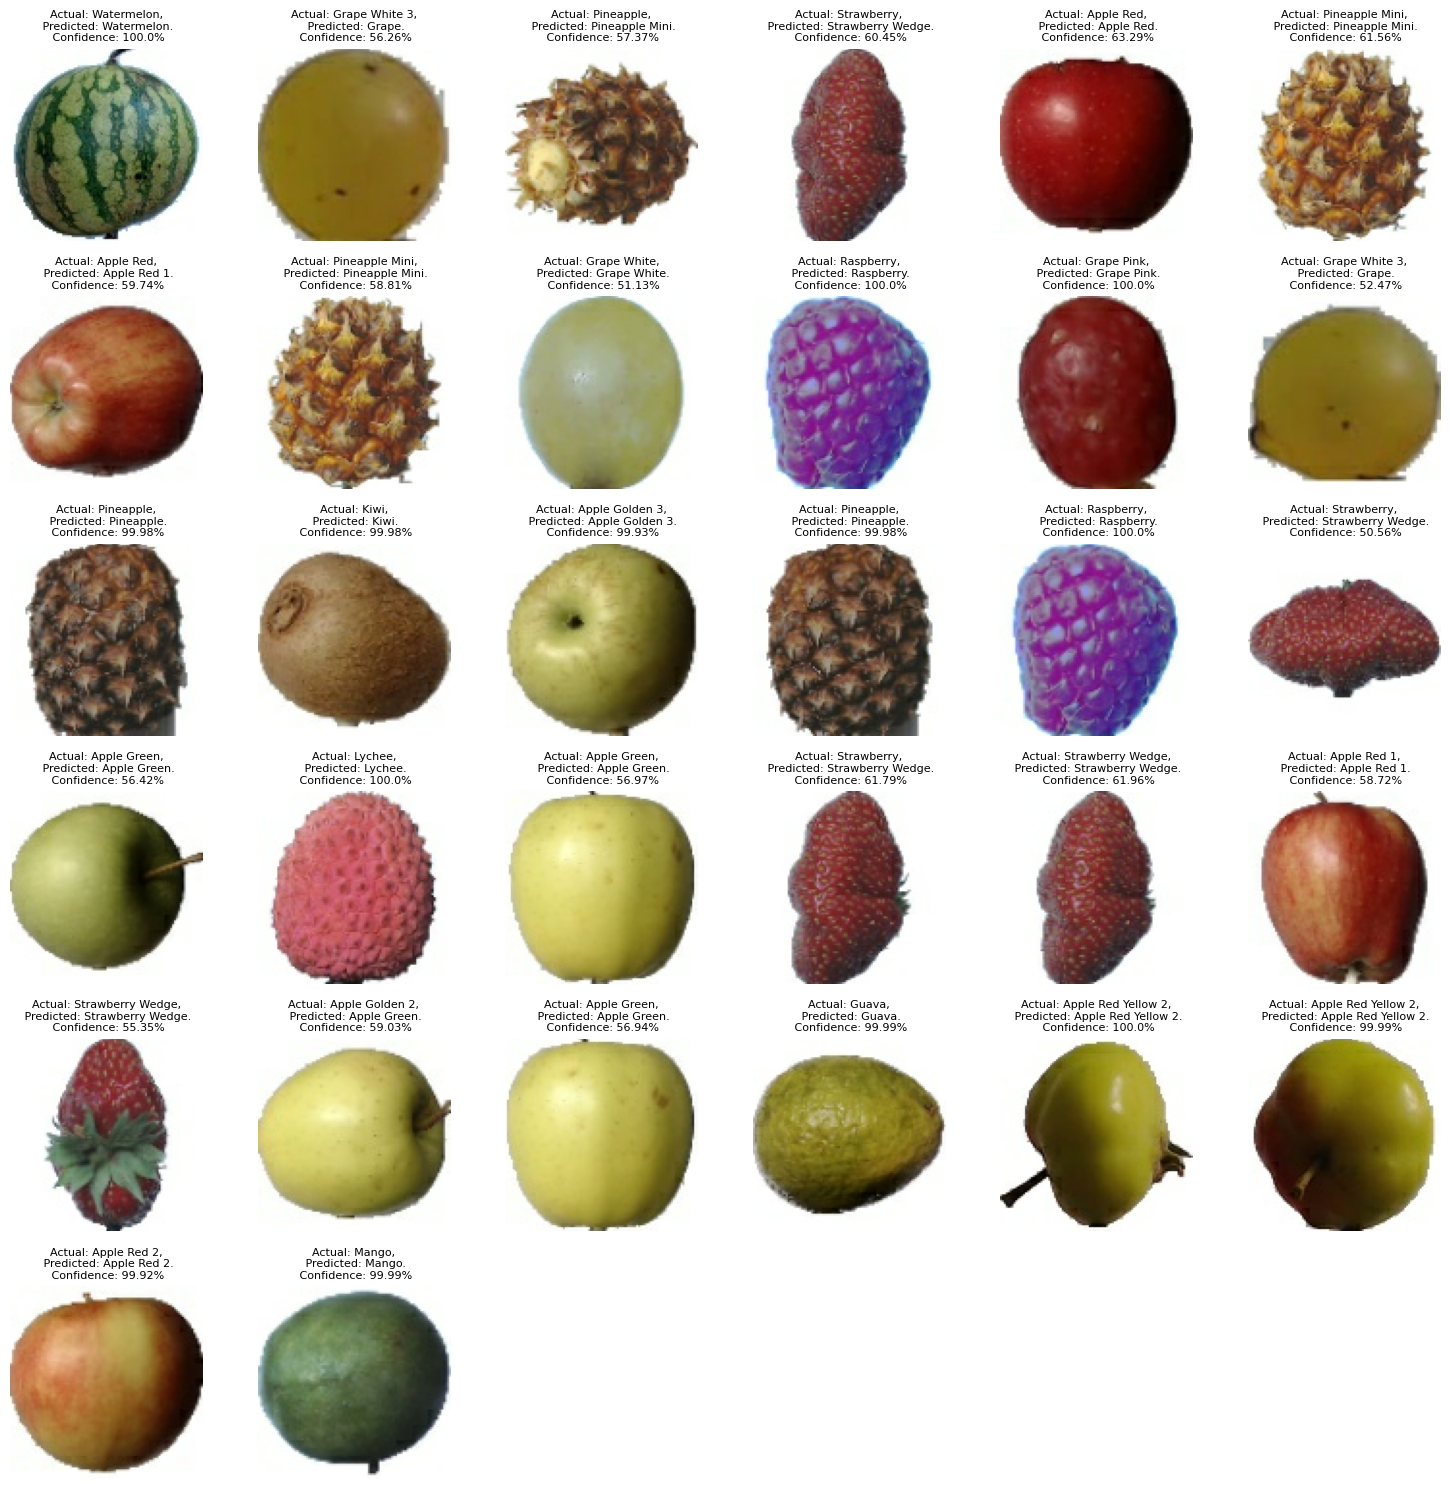

In [58]:
plt.figure(figsize=(15, 15))

# Iterate over the batches and then the images to display their predictions
batch_size = 32
for images, labels in test_dataset.take(15):
    for i in range(batch_size):
        if i >= len(images):
            break

        ax = plt.subplot(6, 6, i + 1)
        image = tf.image.resize(images[i], (100, 100))
        plt.imshow(image.numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = ts_class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", fontsize=8)
        plt.axis("off")

    # If there are more than batch size images, break out of the loop
    if i >= batch_size - 1:
        break

# Hide any empty subplots
for i in range(i + 1, batch_size):
    plt.subplot(6,6, i + 1)
    plt.axis("off")

plt.tight_layout()
plt.show()